In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Data generation

In [2]:
def f(x, scale=0.1):
    val = 0.75 + 2.25 * x + np.random.RandomState(42).normal(scale=scale, size=len(x))
    return val

x1 = np.linspace(-1, 1, 50)
y = f(x1, scale=0.2)

x1 = np.round(x1, 3)
y = np.round(y, 3)

df = pd.DataFrame()
df['x1'] = x1
df['y'] = y

df.to_csv("data.csv", index=False)

## Read data

Your task is to find parameters $\beta$ of a linear model that approximates the following observations. Each observation is decribed by only one input feature $x_{1}$.

In [3]:
# Read data for the file
data = pd.read_csv("data.csv")

# Display the first 5 rows of the data
data.head()

,x1,y
0,-1.000,-1.401
1,-0.959,-1.436
2,-0.918,-1.187
3,-0.878,-0.920
4,-0.837,-1.179


In [4]:
# Get a matrix of the input feature of the observations
x1 = data[['x1']].values

# Get a vector of target values you need to approximate
y = data['y'].values

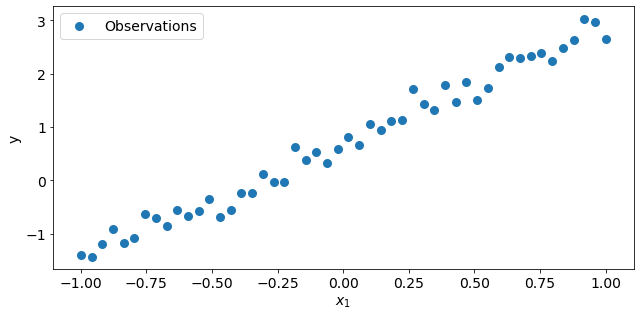

In [5]:
# Plot the observations

plt.figure(figsize=(9, 4.5))
plt.scatter(x1, y, linewidth=3, label="Observations")
plt.xlabel(r'$x_{1}$', size=14)
plt.xticks(size=14)
plt.ylabel(r"y", size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.show()

## Create matrix X

Now you have the vector of targets $y = (y_{1}, y_{2}, ..., y_{n})^{T}$. Create a matrix $X$ that is defined as

$$
X = \left( \begin{array}{ccccc} 
         1 & x_{11} & x_{12} & \cdots & x_{1d} \\ 
         1 & x_{21} & x_{22} & \cdots & x_{2d} \\ 
         \vdots & \vdots  & \vdots  & \cdots & \vdots  \\
         1 & x_{n1} & x_{n2} & \cdots & x_{nd} \\ 
         \end{array} \right)
$$

Rememder that your observations have only one input feature $x_{i1}$.

**Hint:** Use `np.ones()` function to generate a vector of ones $(1, 1, ..., 1)^{T}$. To concatenate two matrices $a$ and $b$ use function `np.hstack((a, b))`.

In [6]:
ones = np.ones(shape=(len(x1), 1))
X = np.hstack((ones, x1))

print("Output:")
X[:2, :]

Output:


array([[ 1.   , -1.   ],
       [ 1.   , -0.959]])

Expected otput :  
`[[ 1.   , -1.   ], 
  [ 1.   , -0.959]]`

## Linear model parameters

Estimate parameters $\beta$ of a linear model using the following formula:

$$
\beta = (X^{T}X)^{-1}X^{T}y
$$

**Hint:** Use `nnp.linalg.inv()` function to calculate inverse of a matrix. To multiply two matrices $a$ and $b$ use functions `a.dot(b)` or `np.dot(a, b)`.

In [7]:
beta = np.linalg.inv( X.T.dot(X) ).dot(X.T).dot(y)

print("Output:")
beta

Output:


array([0.70486  , 2.1921114])

## Approximation

Check the found parameters $\beta$ by calculating a vector of approximations $\hat{y} = (\hat{y}_{1}, \hat{y}_{2}, ..., \hat{y}_{n})^{T}$:

$$
\hat{y} = X\beta
$$

In [8]:
y_hat = X.dot(beta)

print("Output:")
y_hat[:2]

Output:


array([-1.4872514 , -1.39737484])

Expected otput :  
`[-1.4872514 , -1.39737484]`

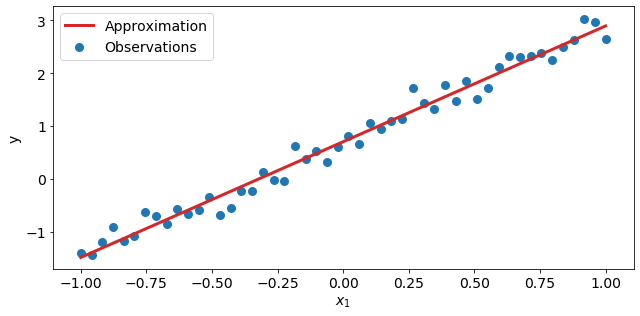

In [9]:
plt.figure(figsize=(9, 4.5))
plt.scatter(X[:, 1], y, linewidth=3, label="Observations")
plt.plot(X[:, 1], y_hat, linewidth=3, label="Approximation", color='C3')
plt.xlabel(r'$x_{1}$', size=14)
plt.xticks(size=14)
plt.ylabel(r"y", size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.tight_layout()
plt.show()

## Loss function

Calculate the loss function value for the found approximation:

$$
L(\beta) = \frac{1}{n} (\hat{y} - y)^{T}(\hat{y} - y)
$$

In [10]:
loss = (y_hat - y).T.dot(y_hat - y) / len(y)

print("Output:")
loss

Output:


0.03306972383843927